In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('creditcard.csv')

count_class_0, count_class_1 = data.Class.value_counts()

df_class_0 = data[data['Class'] == 0]
df_class_1 = data[data['Class'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

y = df_test_over['Class']
X = df_test_over.drop('Class', axis = 1)

cols = X.columns
num_cols = X._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

oe=OrdinalEncoder()
X[cat_cols]=oe.fit_transform(X[cat_cols])

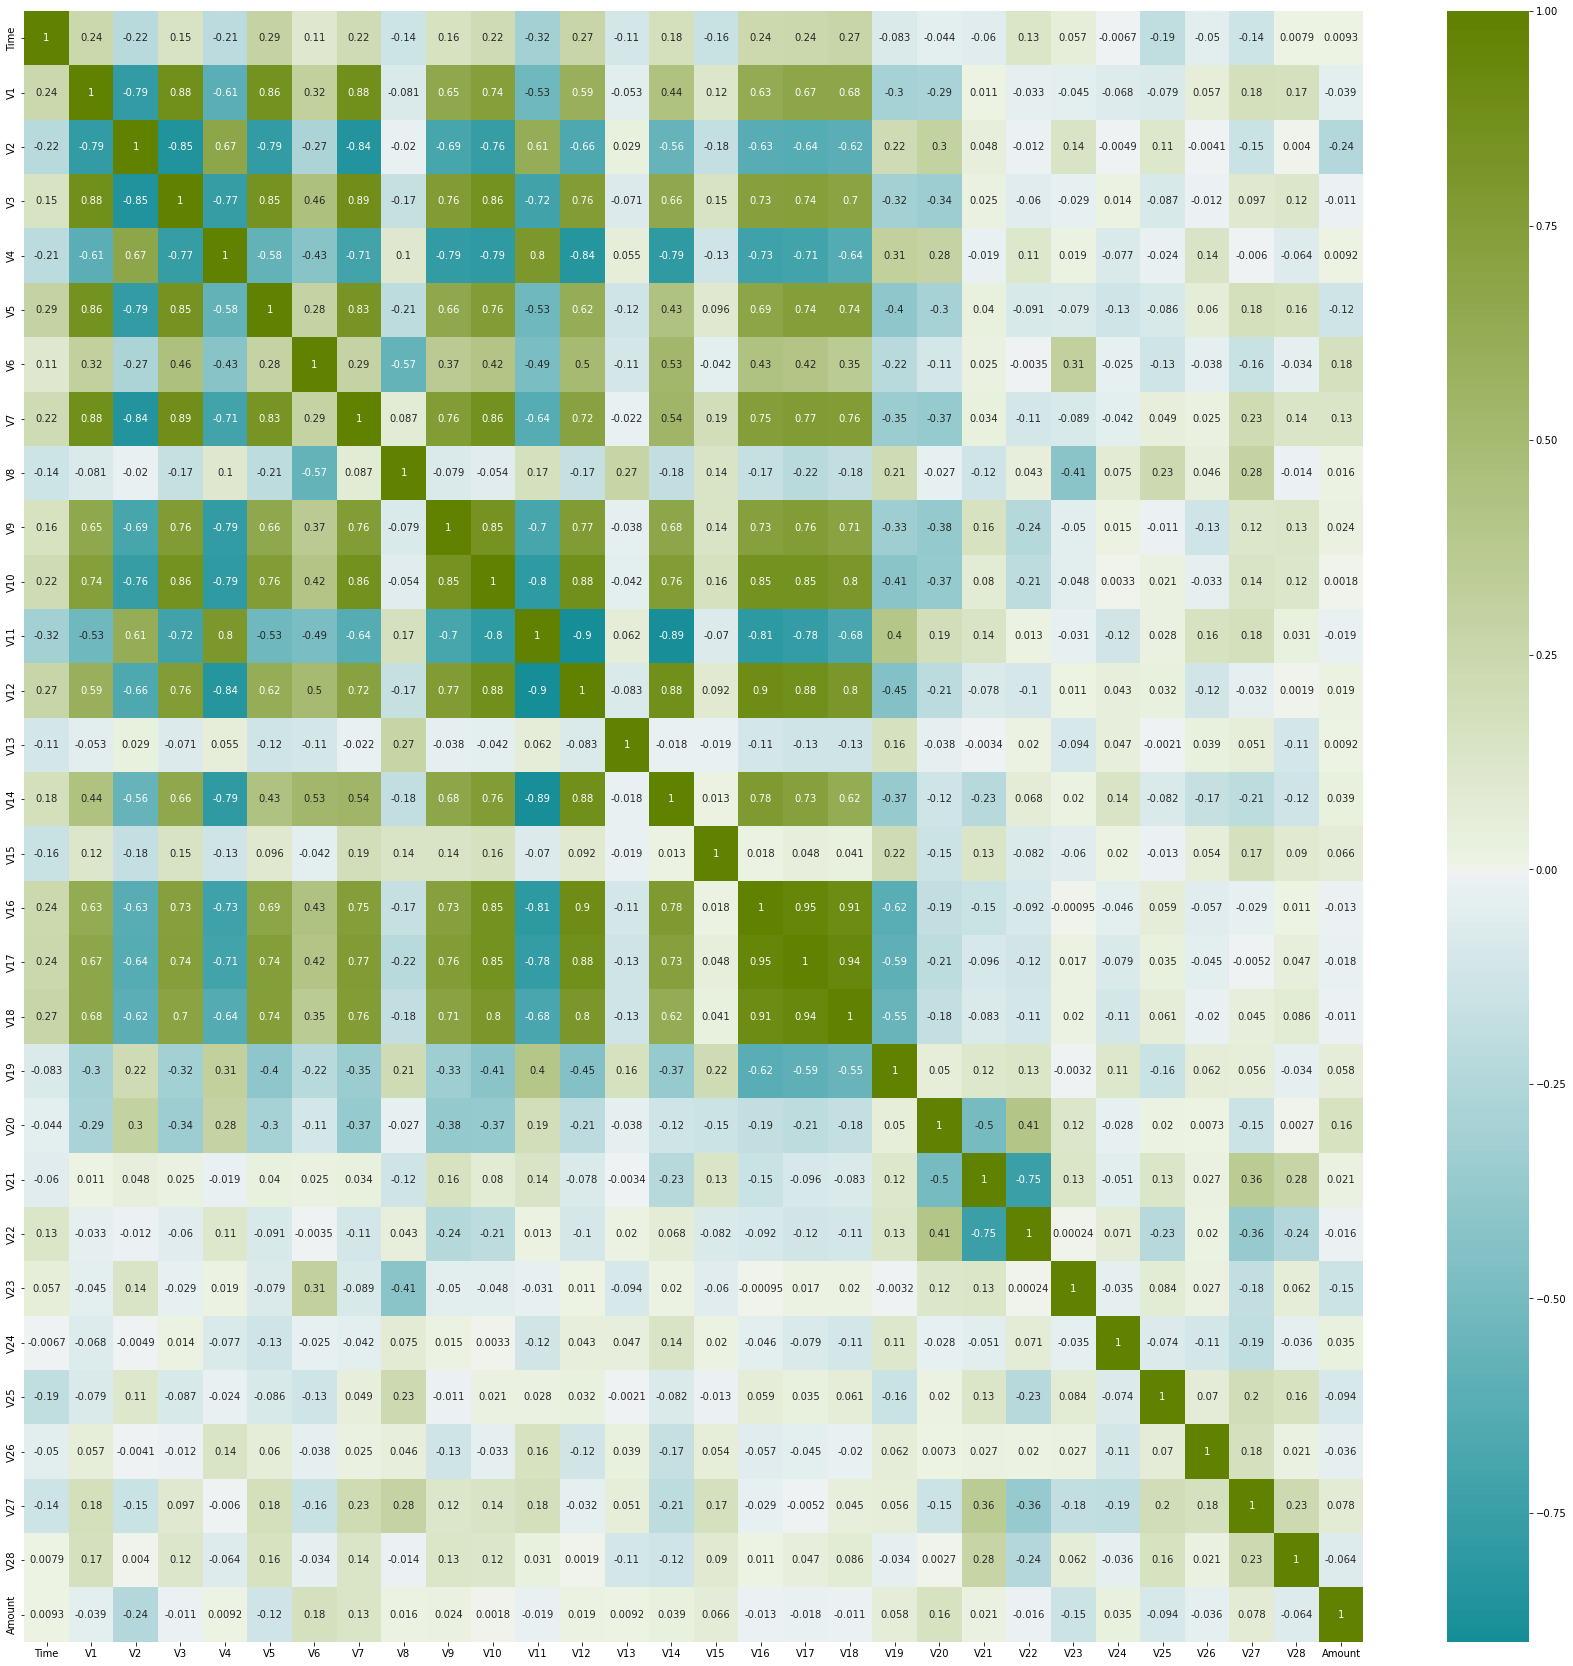

In [3]:
corr_data = X.corr()
fig, ax = plt.subplots(figsize = (30, 30))
color_map = sns.diverging_palette(204, 106, s = 100, as_cmap=True)
sns.heatmap(corr_data,cmap=color_map, annot=True, ax = ax, center=0.00000)
plt.show()
del corr_data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
train_acc = model.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Training Set is 95.03719466085153
The Accuracy for Test Set is 94.96509153579656


In [8]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", (2*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred)))

Accuracy: 0.9496509153579656
Precision: 0.9770298946427907
Recall: 0.9211653211653211
F1-score: 0.9482755505772255


Confusion Matrix : 
 [[55512  1234]
 [ 4492 52488]]



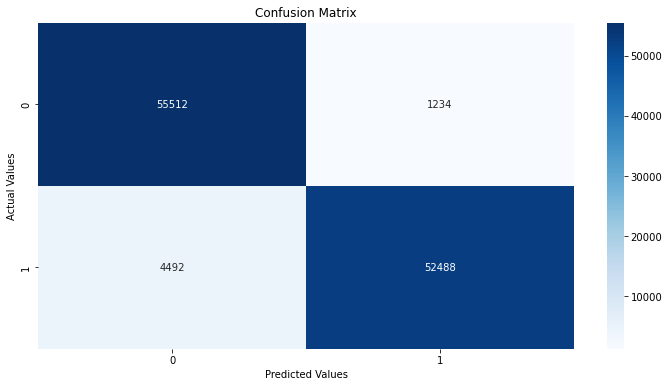

In [9]:
cm = confusion_matrix(y_test, y_pred)  
print ("Confusion Matrix : \n", cm)
print("")

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')